In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from numpy import linalg
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer

In [72]:
def func_exp(x, a, b, c):
    """Return values from a general exponential function."""
    return a * np.exp(b * x) + c

Day 1 : Italy: 1     ,     US: 28
Day 2 : Italy: 2     ,     US: 36
Day 3 : Italy: 3     ,     US: 40
Day 4 : Italy: 7     ,     US: 47
Day 5 : Italy: 10     ,     US: 54
Day 6 : Italy: 12     ,     US: 63
Day 7 : Italy: 17     ,     US: 85
Day 8 : Italy: 21     ,     US: 108
Day 9 : Italy: 29     ,     US: 118
Day 10 : Italy: 34     ,     US: 200
Day 11 : Italy: 52     ,     US: 244
Day 12 : Italy: 79     ,     US: 307
Day 13 : Italy: 107
Day 14 : Italy: 148
Day 15 : Italy: 197
Day 16 : Italy: 233
Day 17 : Italy: 366
Day 18 : Italy: 463
Day 19 : Italy: 631
Day 20 : Italy: 827
Day 21 : Italy: 827
Day 22 : Italy: 1266
Day 23 : Italy: 1441
Day 24 : Italy: 1809
Day 25 : Italy: 2158
Day 26 : Italy: 2503
Day 27 : Italy: 2978
Day 28 : Italy: 3405
Day 29 : Italy: 4032
Day 30 : Italy: 4825


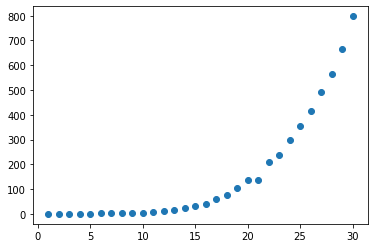

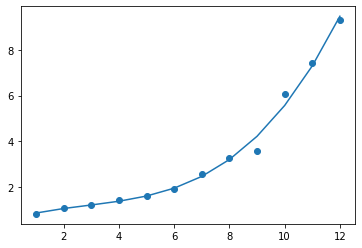

[399.27272727 504.74825175 629.92507493 776.56543457 946.43156843]


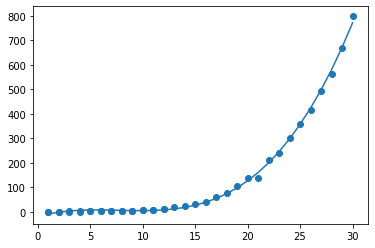

[ 383.56316671  589.80814102  884.36711132 1281.2061696  1794.29140786]


In [149]:
trainData = open('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv', 'r')
train = {}
headers = np.array([x.strip() for x in trainData.readline().split(',')])
for line in trainData:
    l = np.array([x.strip() for x in line.split(',')])
    if l.size is 65:
        continue
    deaths = np.array(l[4:]).astype(int)
    if l[1] in train.keys():
        train[l[1]] = train[l[1]] + deaths
    else:
        train[l[1]] = deaths
        
for i in range(len(train["Italy"][train["Italy"] != 0])):
    print("Day", i+1, ": Italy:", int(train["Italy"][train["Italy"] != 0][i]), end='')
    if i < len(train["US"][train["US"] != 0]):
        print("     ,     US:", int(train["US"][train["US"] != 0][i] ), end='')
    print('')
    
italyY = train["Italy"][train["Italy"] != 0] / 60486000 * 10000000
usY = train["US"][train["US"] != 0] / 329424000 * 10000000
italyX = range(1, 31)
usX = range(1, 13)


plt.scatter(italyX, italyY)
plt.show()


plt.scatter(range(1, 13), usY)
fit = np.poly1d(np.polyfit(usX, usY, 3))
plt.plot(usX, fit(usX), '-')
plt.show()

print(np.array(fit([13, 14, 15, 16, 17])) * 329424000 / 10000000)

combinedX = []
for i in range(1, 13):
    combinedX.append(i)
    combinedX.append(i)
    
for i in range(13, 31):
    combinedX.append(i)
combinedY = []
for i in range(0, 12):
    combinedY.append(italyY[i])
    combinedY.append(usY[i])
    
for i in range(12, 30):
    combinedY.append(italyY[i])
#plt.scatter(range(1, 13), italyY[:12])
plt.scatter(combinedX, combinedY)
fit = np.poly1d(np.polyfit(combinedX, combinedY, 3))
plt.plot(combinedX, fit(combinedX), '-')
plt.show()
print(np.array(fit([13, 14, 15, 16, 17])) * 329424000 / 10000000)